In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import seaborn as sns

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

['data', 'feature_names', 'DESCR', 'target']


In [4]:
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
boston_frame = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [6]:
boston_frame['Y'] = boston_dataset.target

In [7]:
boston_frame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
boston_frame.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Y
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(506, 13)


<IPython.core.display.Javascript object>


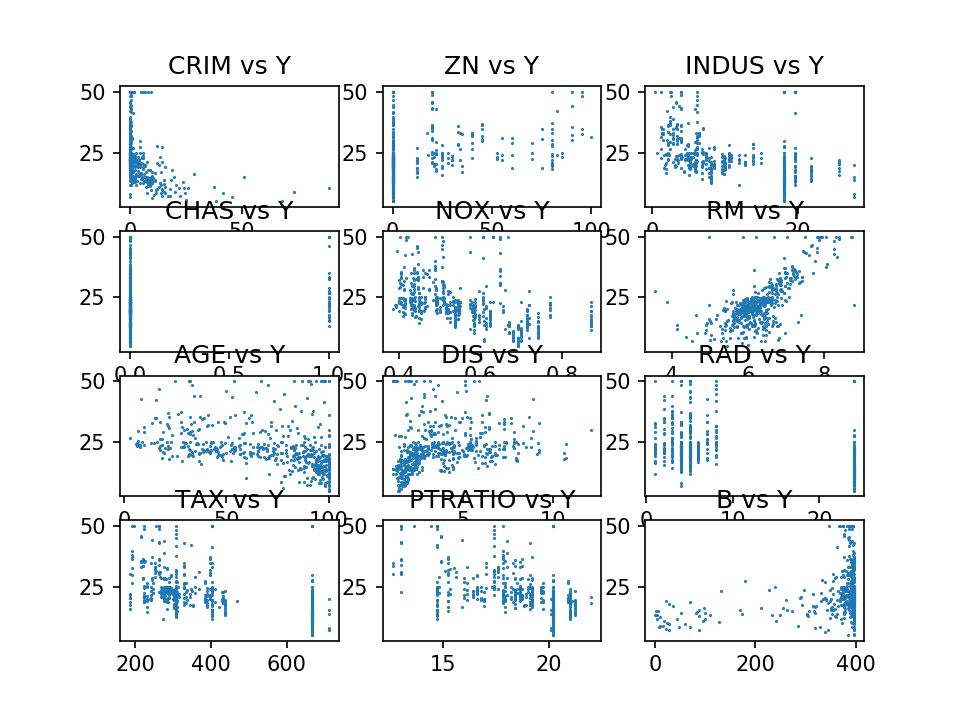

In [9]:
X = boston_frame.drop('Y', axis=1)
Y = boston_frame['Y']
print(X.shape)

# Plot the Features X vs Y
f, axarr = plt.subplots(4, 3)
key_index = 0
X_array = np.array(X)
for i in range(4):
    for j in range(3):
        feature_name = boston_dataset.feature_names[key_index]
        axarr[i, j].scatter(X_array[:, key_index], Y, s=0.25)
        axarr[i, j].set_title('{} vs Y'.format(feature_name))
        key_index += 1
        
plt.show()

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=3/4., random_state=0)

In [11]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

Train MSE 14.1087485947
Test MSE 30.7603011803


/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [12]:
lm = Ridge(alpha=0.5)
lm.fit(X_train, Y_train)

Y_train_pred = lm.predict(X_train)
Y_test_pred = lm.predict(X_test)

train_mse = sklearn.metrics.mean_squared_error(Y_train, Y_train_pred)
test_mse = sklearn.metrics.mean_squared_error(Y_test, Y_test_pred)
print("Train MSE {}".format(train_mse))
print("Test MSE {}".format(test_mse))

Train MSE 14.2223063799
Test MSE 30.5550764518


# 